In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu08 = pd.read_csv('AHU_08.csv')
ahu08 = ahu08.ffill()
ahu08.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,31-12-2015,00:00:00,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
1,31-12-2015,00:00:11,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
2,31-12-2015,00:01:44,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
3,31-12-2015,00:13:05,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
4,31-12-2015,00:13:15,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3


In [3]:
ahu08.rename(columns={'Column1':'Date','Column2':'Time','Column3':'supply fan ON?OFF','Column4':'Cooling coil valve %open'},inplace = 1)
ahu08.rename(columns={'Column5':'Cold Deck temperature','Column6':'exhaust fans ON?OFF','Column7':'Hot Deck temperature'},inplace = 1)
ahu08.rename(columns={'Column8':'Mixed air damper % open','Column9':'Mixed air temperature','Column10':'Pre-heat coil discharger temperature'},inplace = 1)
ahu08.rename(columns={'Column11':'Pre-heat coil Discharger valve','Column12':'Return air temperature','Column13':'Re-heat coil Discharger value'},inplace = 1)
ahu08.head()

,Date,Time,supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed air damper % open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil Discharger valve,Return air temperature,Re-heat coil Discharger value
0,31-12-2015,00:00:00,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
1,31-12-2015,00:00:11,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
2,31-12-2015,00:01:44,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
3,31-12-2015,00:13:05,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3
4,31-12-2015,00:13:15,ON,2.0,62.6,ON,103.1,8.8,54.8,63.0,15.0,76.5,8.3


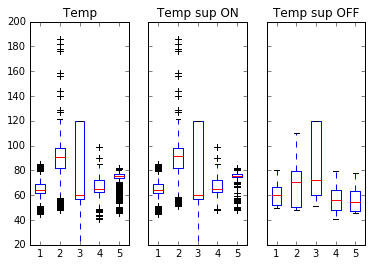

In [7]:
data_temp= [ahu08['Cold Deck temperature'],ahu08['Hot Deck temperature'],ahu08['Mixed air temperature'],
            ahu08['Pre-heat coil discharger temperature'],ahu08['Return air temperature']]
sup_on = ahu08[ahu08['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu08[ahu08['supply fan ON?OFF'].str.contains('OFF')]
data_temp_1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature'],
            sup_on['Pre-heat coil discharger temperature'],sup_on['Return air temperature']]
data_temp_2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature'],
            sup_off['Pre-heat coil discharger temperature'],sup_off['Return air temperature']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_08']))

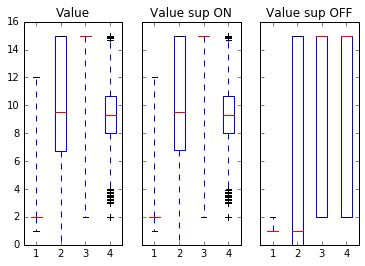

In [8]:
data_value = [ahu08['Cooling coil valve %open'],ahu08['Mixed air damper % open'],
              ahu08['Pre-heat coil Discharger valve'],ahu08['Re-heat coil Discharger value']]
data_value_1 = [sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],
              sup_on['Pre-heat coil Discharger valve'],sup_on['Re-heat coil Discharger value']]
data_value_2 = [sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],
              sup_off['Pre-heat coil Discharger valve'],sup_off['Re-heat coil Discharger value']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value sup OFF')
#plt.show()
plt.savefig(''.join(['values%','_ahu_08']))

In [6]:
print ahu08.columns.values
df1 = ahu08.copy()
df1 = df1.drop(['Date', 'Time', 'supply fan ON?OFF', 'exhaust fans ON?OFF'],1)
print df1.columns.values

['Date' 'Time' 'supply fan ON?OFF' 'Cooling coil valve %open'
 'Cold Deck temperature' 'exhaust fans ON?OFF' 'Hot Deck temperature'
 'Mixed air damper % open' 'Mixed air temperature'
 'Pre-heat coil discharger temperature' 'Pre-heat coil Discharger valve'
 'Return air temperature' 'Re-heat coil Discharger value']
['Cooling coil valve %open' 'Cold Deck temperature' 'Hot Deck temperature'
 'Mixed air damper % open' 'Mixed air temperature'
 'Pre-heat coil discharger temperature' 'Pre-heat coil Discharger valve'
 'Return air temperature' 'Re-heat coil Discharger value']


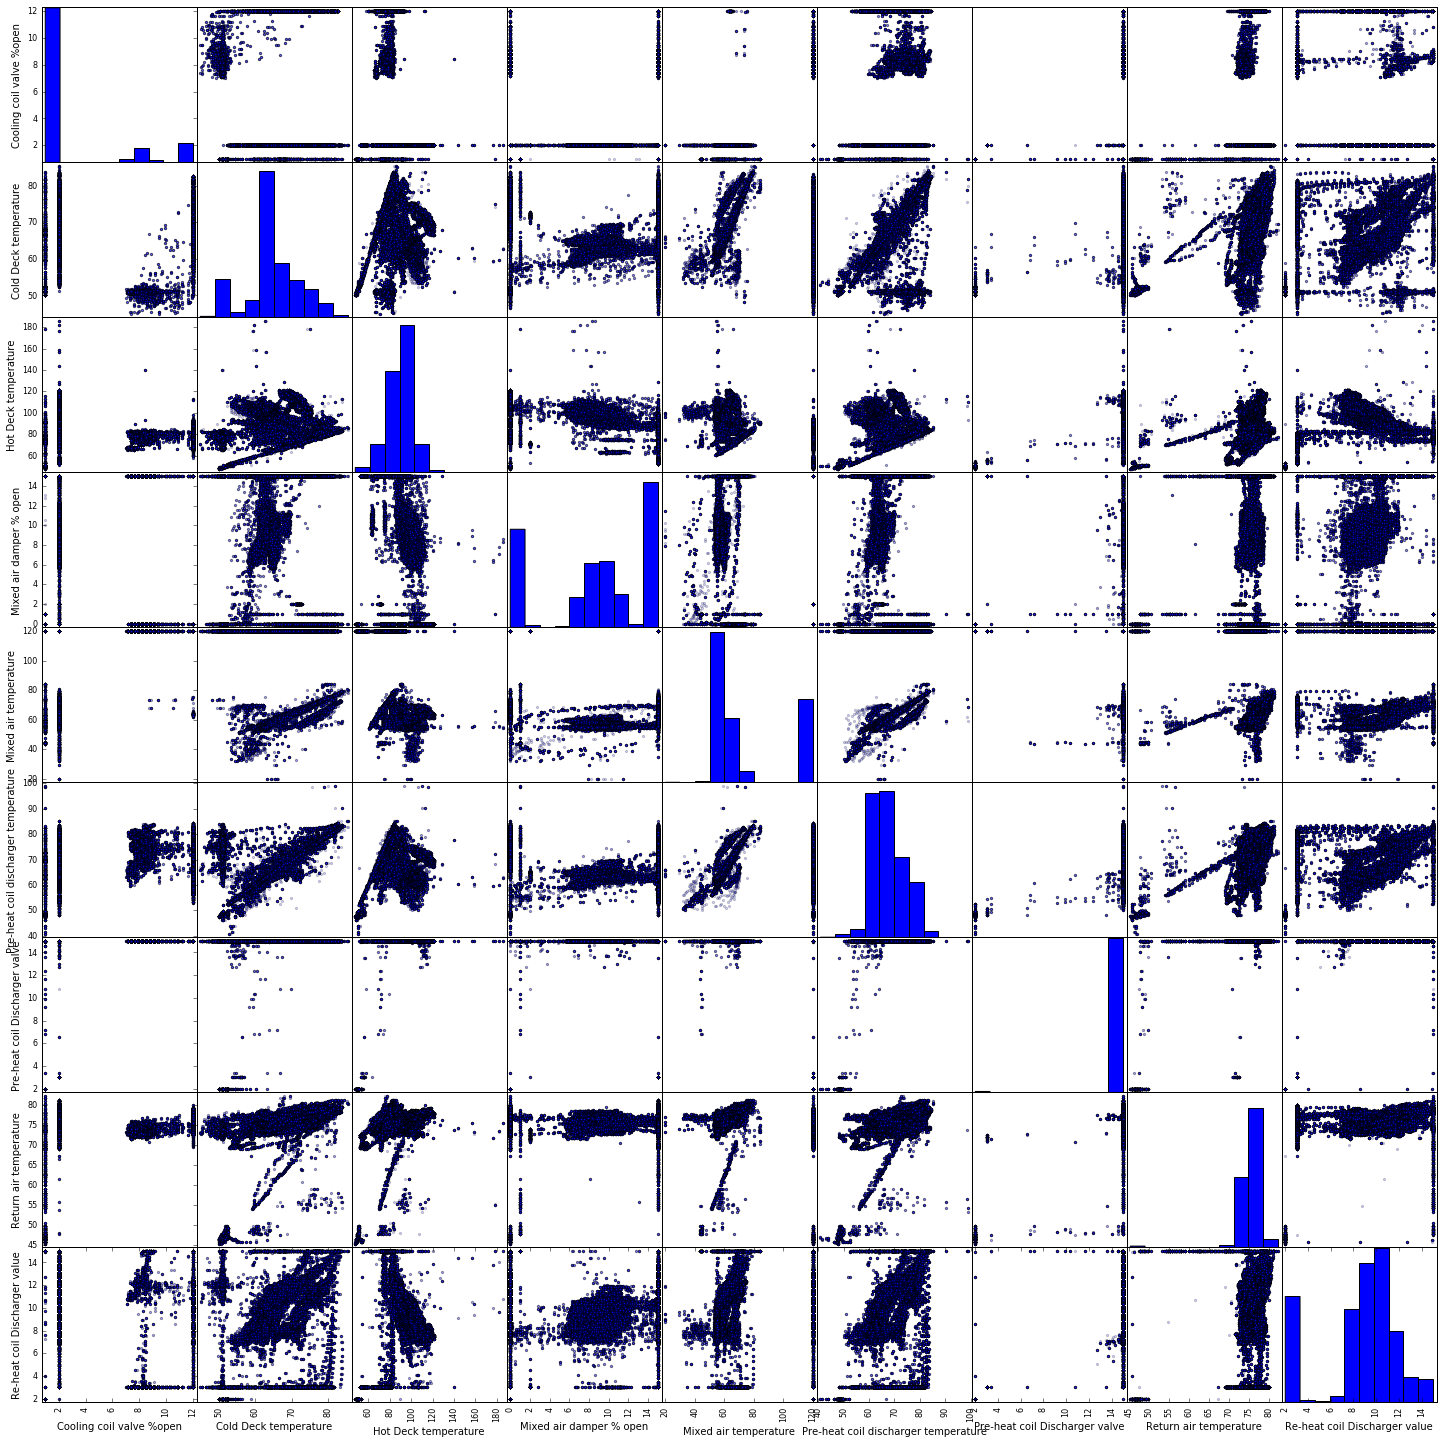

In [7]:
df = pd.scatter_matrix(df1,alpha=0.2,figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_08']))